##***Exploratory Data Analysis of Haberman's DataSet***

In [78]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1z5-gm1KQvdodIxZXaaoWuV_6_LYriBgI


In [79]:
# Download a file based on its file ID.
file_id = '1YJzytNcpvROyRBGC_lRt_nUezp0dczae'
downloaded = drive.CreateFile({'id': file_id})
'Downloaded content "{}"'.format(downloaded.GetContentString())
#https://drive.google.com/open?id=1YJzytNcpvROyRBGC_lRt_nUezp0dczae

'Downloaded content "age,operation_year,axil_nodes,status\n30,64,1,1\n30,62,3,1\n30,65,0,1\n31,59,2,1\n31,65,4,1\n33,58,10,1\n33,60,0,1\n34,59,0,2\n34,66,9,2\n34,58,30,1\n34,60,1,1\n34,61,10,1\n34,67,7,1\n34,60,0,1\n35,64,13,1\n35,63,0,1\n36,60,1,1\n36,69,0,1\n37,60,0,1\n37,63,0,1\n37,58,0,1\n37,59,6,1\n37,60,15,1\n37,63,0,1\n38,69,21,2\n38,59,2,1\n38,60,0,1\n38,60,0,1\n38,62,3,1\n38,64,1,1\n38,66,0,1\n38,66,11,1\n38,60,1,1\n38,67,5,1\n39,66,0,2\n39,63,0,1\n39,67,0,1\n39,58,0,1\n39,59,2,1\n39,63,4,1\n40,58,2,1\n40,58,0,1\n40,65,0,1\n41,60,23,2\n41,64,0,2\n41,67,0,2\n41,58,0,1\n41,59,8,1\n41,59,0,1\n41,64,0,1\n41,69,8,1\n41,65,0,1\n41,65,0,1\n42,69,1,2\n42,59,0,2\n42,58,0,1\n42,60,1,1\n42,59,2,1\n42,61,4,1\n42,62,20,1\n42,65,0,1\n42,63,1,1\n43,58,52,2\n43,59,2,2\n43,64,0,2\n43,64,0,2\n43,63,14,1\n43,64,2,1\n43,64,3,1\n43,60,0,1\n43,63,2,1\n43,65,0,1\n43,66,4,1\n44,64,6,2\n44,58,9,2\n44,63,19,2\n44,61,0,1\n44,63,1,1\n44,61,0,1\n44,67,16,1\n45,65,6,2\n45,66,0,2\n45,67,1,2\n45,60,0,1\n45,6

In [0]:
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
#getting the content from the csv file
downloaded.GetContentFile('haberman.csv')

In [82]:
# checking whether csv file is loaded or not
!ls

adc.json  haberman.csv	sample_data


In [0]:
#importing the required libraries needed for the analysis
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [84]:
#using pandas creating a data frame
df = pd.read_csv('haberman.csv')
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [85]:
#colums present in the data set
df.columns

Index(['age', 'operation_year', 'axil_nodes', 'status'], dtype='object')

In [86]:
# finding the number of datapoins,feaatures
df.shape

(306, 4)

**Obervation:**
*  ** 306 is the row count which indiactes the number of patients and 4 is the column count which indicates the variable count**

In [87]:
#count of similar kind of data in the patient status
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Obervation:**
* ** 225 and 81 shows the count of patients who have survived more than 5 years and less than 5 years after the operation respectively.**

#***Bivariate Analysis***

##Scatterplot


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


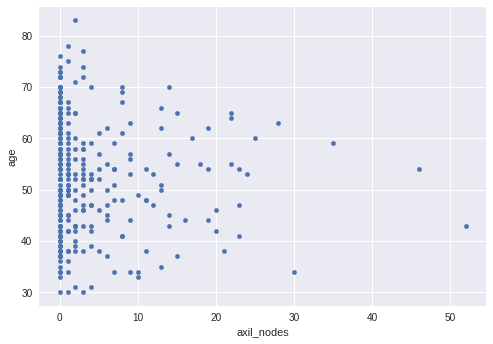

In [88]:
#plotting the scatter plot
df.plot(kind = 'scatter',x = 'axil_nodes', y = 'age')  
plt.show()

**Obervation:**
* **From the above scatter plots we can infer that most the patients dont have axil_nodes (i.e axil_nodes  =0 )and very few patients have axil_nodes above 30**

## Swarm plot

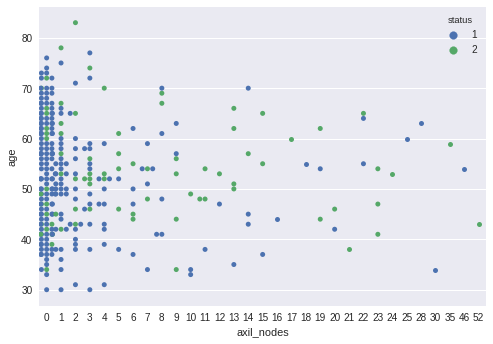

In [89]:
#plotting the swarm plot where data about axil_nodes,age and status can be represented.
sb.swarmplot(x = 'axil_nodes', y = 'age', data = df,hue = 'status',size = 5)
plt.show()

**observation:**


*  **From the above plot, we can observe more number of patients have survived more than 5 years  have 0 axil_nodes.**
* **More number of patients have axil_nodes < 5 and very less number of patients having more axil_nodes and in the plot.** 
*  ** U can observe as the number of axial nodes increase the density of patients decreases gradually and patients having axial_nodes above 30 are very few**











## Pair plots

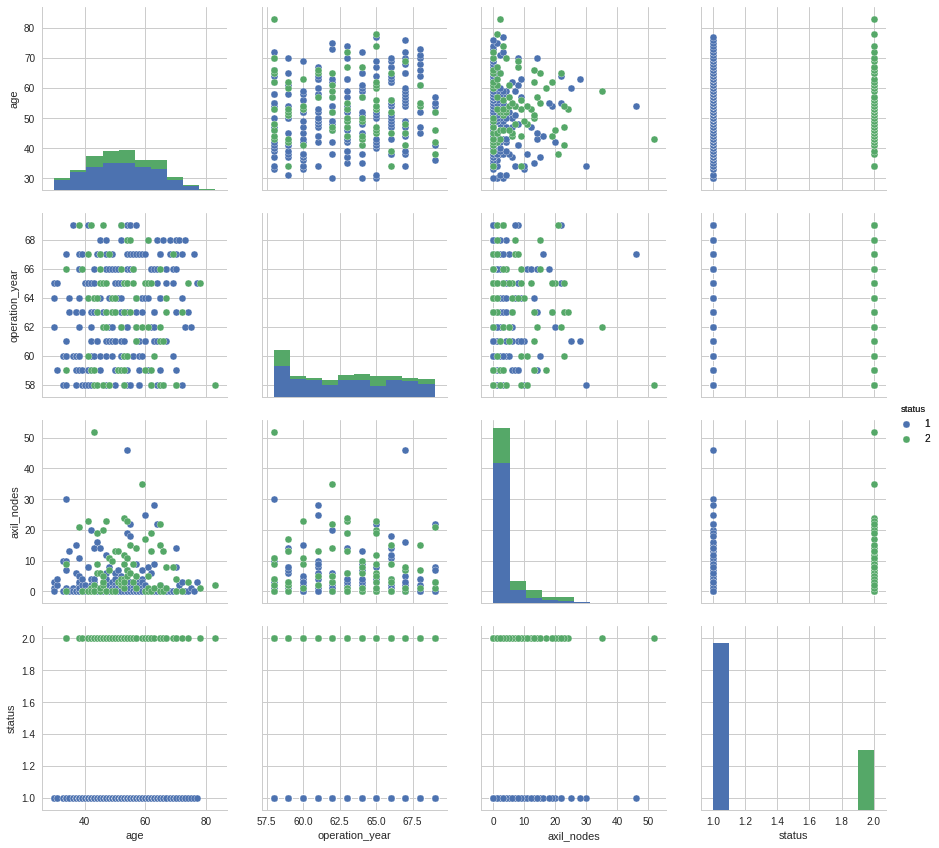

In [90]:
# plotting the 2-dimensional pair plots between diffrent variables
sb.set_style('whitegrid')
sb.pairplot(data = df[['age','operation_year','axil_nodes','status']],hue = 'status',size = 3).add_legend()
plt.show()

**Observations:**

*  **As observed in the swarm plot we can make same observations from the age vs axil_node pairplot.**
*  ** we cannot make any observation on the operation_year vs status from the pair plot since most of the datapoints were overlapped**

## Analysis using statistical properties of data

In [91]:
#observing some statistical properties of the data
df.describe()

,age,operation_year,axil_nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations**
* **Opeartions were happened between 1958 to 1969**
* **The patients are aged between 30 and 83**
* **The mean of the status is 1.26 which little bit closer to 1 than 2 .So we can say that more than half of the people lived for more than 5 years after the operation **
* ** There are patients with 0 axil_nodes**


In [92]:
#grouping the data by status.By doing this we can split the data according the property that data has which helps in analysing the data more precisely
grouped_status = df.groupby('status')
for key,item in grouped_status:
  print(key)
  print(item)

1
     age  operation_year  axil_nodes  status
0     30              64           1       1
1     30              62           3       1
2     30              65           0       1
3     31              59           2       1
4     31              65           4       1
5     33              58          10       1
6     33              60           0       1
9     34              58          30       1
10    34              60           1       1
11    34              61          10       1
12    34              67           7       1
13    34              60           0       1
14    35              64          13       1
15    35              63           0       1
16    36              60           1       1
17    36              69           0       1
18    37              60           0       1
19    37              63           0       1
20    37              58           0       1
21    37              59           6       1
22    37              60          15       1
23    37

In [0]:
#creating data frames for the data by splitting according to the status
df_gt5 = df.loc[df['status'] == 1]
df_lt5 =df.loc[df['status'] == 2]

In [94]:
df_gt5.describe()

,age,operation_year,axil_nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


**Observations about the patients who lived more than 5 years:**
* **The max age is 77**
* **Highest number of axil_nodes found is 46**
* **count of patients is 225 and mean of axil_nodes is 2.79**


In [95]:
df_lt5.describe()

,age,operation_year,axil_nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0




* **The mean of axil_nodes is 7.456 which is almost 2.5 times more than the axil_nodes we found in the patients who lived more than 5 years.**
* **so we can say that the patient having more than 46 axil_nodes died with in 5 years after the operation **
*  ** The patient having age more than 77 years have not survived more than 5 years after the operation**

# ***Univariate*** ***Analysis* **


##Histograms and PDF


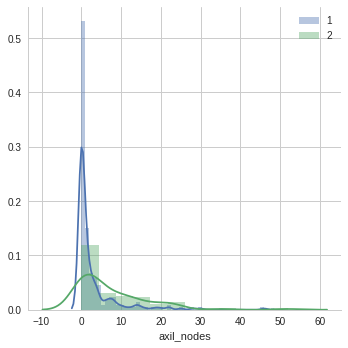

In [96]:
#Histogram plotting and the probability distribution function
sb.FacetGrid( data = df,hue = 'status',size = 5)\
  .map(sb.distplot ,'axil_nodes')
plt.legend()
plt.show()


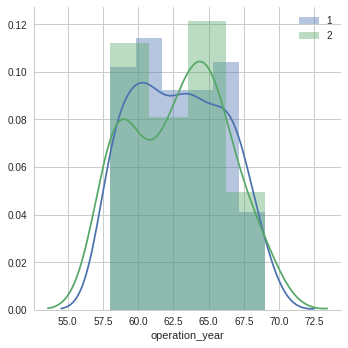

In [97]:
sb.FacetGrid( data = df,hue = 'status',size = 5) \
  .map(sb.distplot ,'operation_year')
plt.legend()
plt.show()

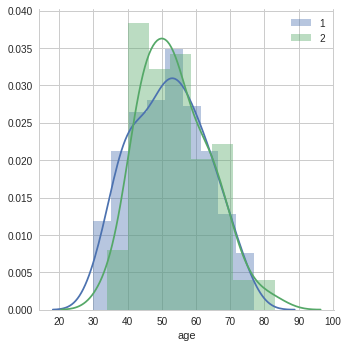

In [98]:
sb.FacetGrid( data = df,hue = 'status',size = 5) \
  .map(sb.distplot ,'age')
plt.legend()
plt.show()

**Observations **
* **From the above PDFs age vs status graph and operation_year vs status graph didnt provide much insight because the data is overlapping in both plots.so we cant make a proper analysis**
* **But from the axil_nodes vs status graph we can say that the probability of patients having '0' axil_nodes is high and the patients having axil_nodes grater than 30 are very less**



   ## Box plots and Strip plot

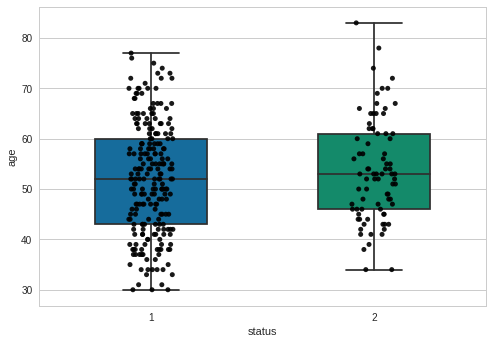

In [99]:
box=sb.boxplot(y='age', x='status', data=df, width=0.5,
                palette="colorblind")
# adding stripplot to boxplot 
box=sb.stripplot(y='age', x='status', 
                   data=df, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.9,
                   color='black')

**Observations**
* **From the stripp plot we can say that more patients have lived for more than 5 years**
* **50% of patients have age less than 53  years**
* **75% of patients have age less than 62 years**

##  violin plots


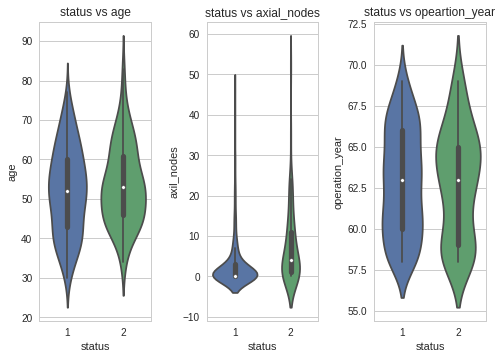

In [100]:
#Plotting the violin plots
plt.subplot(131)
sb.violinplot( x='status', y='age', data=df, marker='o', alpha=0.4 ,)
plt.title("status vs age")
plt.subplot(132)
sb.violinplot( x = 'status', y = 'axil_nodes', data=df, marker='o', alpha=0.5)
plt.title("status vs axial_nodes")
plt.subplot(133)
sb.violinplot( x = 'status', y = 'operation_year', data=df, marker='o', alpha=0.4)
plt.title("status vs opeartion_year")
plt.subplots_adjust(wspace=0.5)


##Summary of Observations 

* **306 is the row count which indictes the number of patients and 4 is the column count which indicates the variable count**
* ** 225 and 81 shows the count of patients who have survived more than 5 years and less than 5 years after the operation respectively.**
* **From the scatter plots we can infer that most the patients dont have axil_nodes (i.e axil_nodes  =0 )and very few patients have axil_nodes above 30**
* **More number of patients have axil_nodes < 5 and very less number of patients having more axil_nodes and in the plot.** 
* **the number of axial nodes increase the density of patients decreases gradually and patients having axial_nodes above 30 are very few**
* ** we cannot make any observation on the operation_year vs status from the pair plot since most of the datapoints were overlapped**
* **Opeartions were happened between 1958 to 1969**
* **The patients are aged between 30 and 83**
* **The mean of the status is 1.26 which little bit closer to 1 than 2 .So we can say that more than half of the people lived for more than 5 years after the operation **
* ** There are patients with 0 axil_nodes**
* **The max age is 77 for the patients who lived more than 5 years**
* **Highest number of axil_nodes found is 46 for the patients who lived more than 5 years**
* **count of patients is 225 and mean of axil_nodes is 2.79 for the patients who lived more than 5 years **
* **The mean of axil_nodes is 7.456 which is almost 2.5 times more than the axil_nodes we found in the patients who lived more than 5 years.**
* **so we can say that the patient having more than 46 axil_nodes died with in 5 years after the operation **
* ** The patient having age more than 77 years have not survived more than 5 years after the operation**
* **From the above PDFs age vs status graph and operation_year vs status graph didnt provide much insight because the data is overlapping in both plots.so we cant make a proper analysis**
* **But from the axil_nodes vs status graph we can say that the probability of patients having '0' axil_nodes is high and the patients having axil_nodes grater than 30 are very less**
* **From the stripp plot we can say that more patients have lived for more than 5 years**
* **50% of patients have age less than 53  years**
* **75% of patients have age less than 62 years**











